<a href="https://colab.research.google.com/github/swake17/personality_druguse/blob/main/PredictingDrugUse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

The traits encompassed Five Factor Model of personality (Neuroticism (N), Extraversion
(E), Openness to Experience (O), Agreeableness (A), and Conscientiousness (C)) are among the most reliable measures in psychologicy research, in terms of stability of individual responses over time, grouping of individuals into personality types, and association with many psychological phenomena of interest.

This analysis aims to predict individual use of addictive drugs from the above five measures of personality, as well as two other personality measures (impulsivity and sensation seeking) and basic demographic information.

Binary classification conducted on five different addictive substances to predict use within the last decade: Amphetamines, benzodiazepines, cocaine, crack cocaine, and heroin.

Comparitive analysis and hyperparamiter tuning will then focus on two targets in particular - amphetamines (the drug with the most balanced classes) and heroin (the target with the highest class imbalance). For these two targets, logistic regression and random forest but will be compared for their performance




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [46]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/obeykhadija/drug-consumptions-uci?select=Drug_Consumption_Quantified.csv')
df = pd.read_csv('/content/drug-consumptions-uci/Drug_Consumption.csv', sep = ',')
df = df.drop(['ID'], axis=1)

Skipping, found downloaded files in "./drug-consumptions-uci" (use force=True to force download)


In [47]:
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


#Data Cleaning

Rating's for Drug Use:

* CL0: Never Used
* CL1: Used over a Decade Ago
* CL2: Used in Last Decade
* CL3: Used in Last Year
* CL4: Used in Last Month
* CL5: Used in Last Week
* CL6: Used in Last Day

Convert strings to numeric (CL0 = 0, and so on)

In [48]:
drug_cols = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
       'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
       'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

for col in drug_cols:
  df[col] = df[col].str.replace('CL', '', regex=True).astype(int)

Analysis will focus on drugs with high potential for abuse:
* `Amphet` (amphetamines)
* `Benzos` (benzodiazepines)
* `Coke` (cocaine)
* `Crack` (crack cocaine)
* `Heroin`

note: `Meth` refers to methadone, a low efficacy opioid used in treating opioid use disorder (not methamphetamine - the highly addictive stimulant, contained within the `Amphet` category). Thus it is not included in above list of substances with high abuse potential.

In [49]:
df.drop(['Alcohol', 'Amyl', 'Caff', 'Cannabis', 'Choc',
             'Ecstasy','Ketamine', 'Legalh', 'LSD',
             'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA'], axis=1, inplace=True)

Convert target values to binary response:

* 0 = no use in the last year (`Non_user`)
* 1 = used within last decade (`User`)

In [50]:
keys = list(range(7))
vals = [0,1,1,1,1,1,1]
targets_dict = dict(zip(keys, vals))


target_drugs = ['Amphet', 'Benzos', 'Coke', 'Crack', 'Heroin']
for target in target_drugs:
  df[target] = df[target].map(targets_dict)

##Outliers

Data contains 7 numeric features - all pertaining to personality measures:


* Nscore: is NEO-FFI-R Neuroticism
* Escore: is NEO-FFI-R Extraversion
* Oscore: is NEO-FFI-R Openness to experience.
* Ascore: is NEO-FFI-R Agreeableness.
* Cscore: is NEO-FFI-R  Conscientiousness.
* Impulsive: is impulsiveness measured by BIS-11
* SS: is sensation seeing measured by ImpSS

from https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified:

All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued

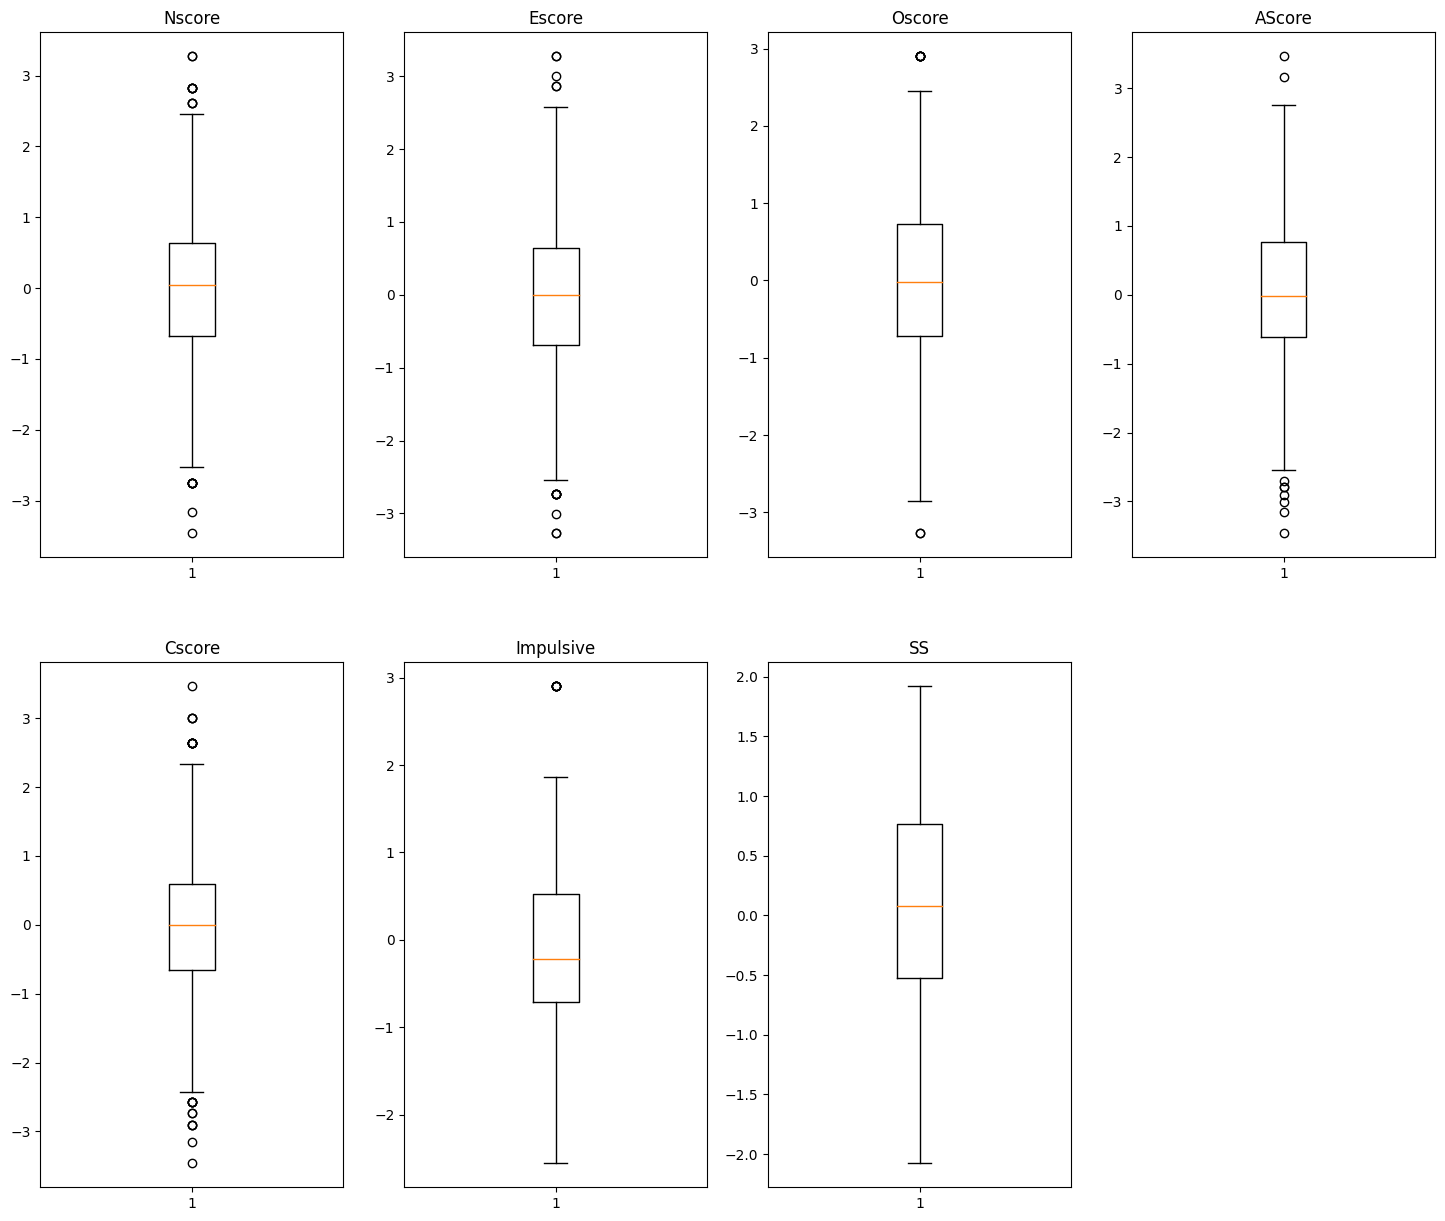

In [51]:
plt.figure(figsize = (18,15))

personality_measures = ['Nscore', 'Escore',	'Oscore',	'AScore',	'Cscore', 'Impulsive', 'SS']
for i in range(len(personality_measures)):
  plt.subplot(2,4,i+1)
  plt.boxplot(df[personality_measures[i]])
  plt.title(personality_measures[i])

plt.show();

In [52]:
from scipy.stats import zscore
zscores = zscore(df[personality_measures])

min = zscores[personality_measures].min().min()
max = zscores[personality_measures].max().max()

print('All personality measures fall within %.2f and %.2f standard deviations of their respective means' % (min, max))


All personality measures fall within -3.47 and 3.47 standard deviations of their respective means


#Univariate Analysis

###Demographic features

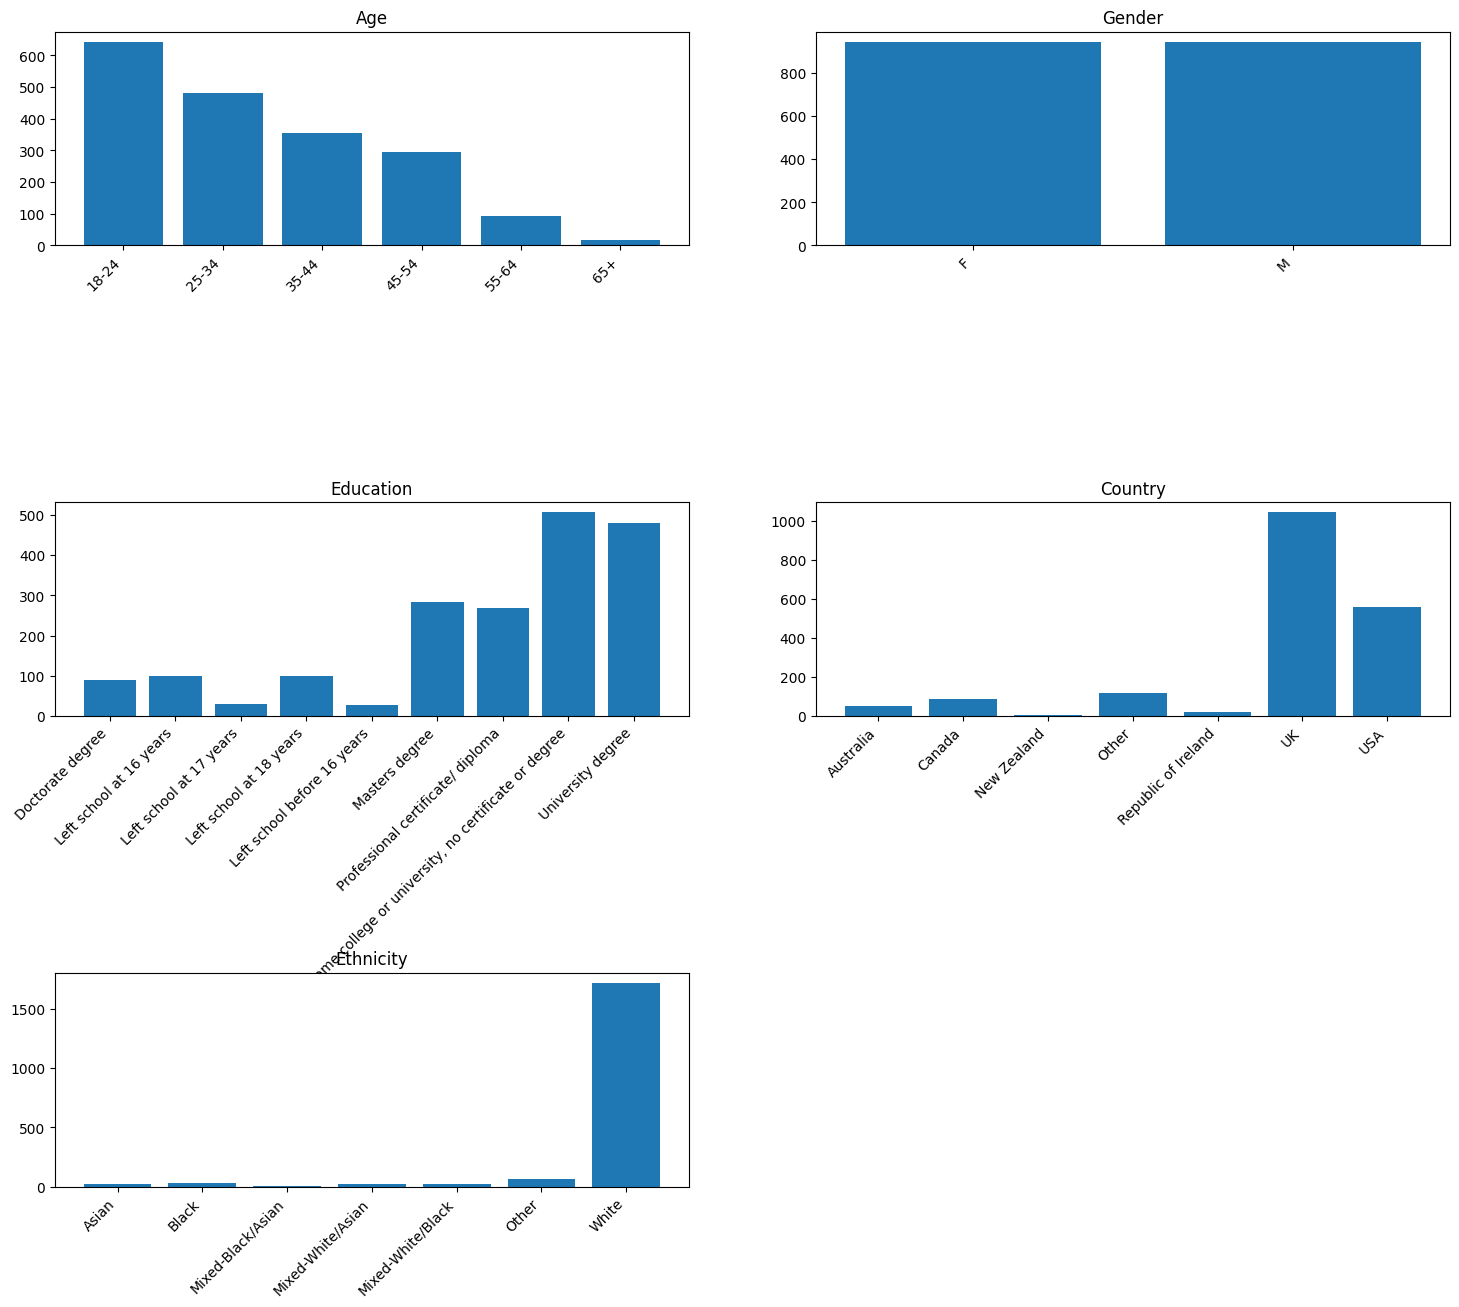

In [53]:
plt.figure(figsize=(18,15))
plt.subplots_adjust(hspace=1.2)

demographics = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity'] #list of demographic columns
for i in range(len(demographics)):
  var = df.columns[i]
  plt.subplot(3,2,i+1)
  plt.bar(df.groupby(var)[var].count().index,
          df.groupby(var)[var].count())
  plt.xticks(rotation=45, ha='right')
  plt.title(df.columns[i])

plt.show()

###Personality measures

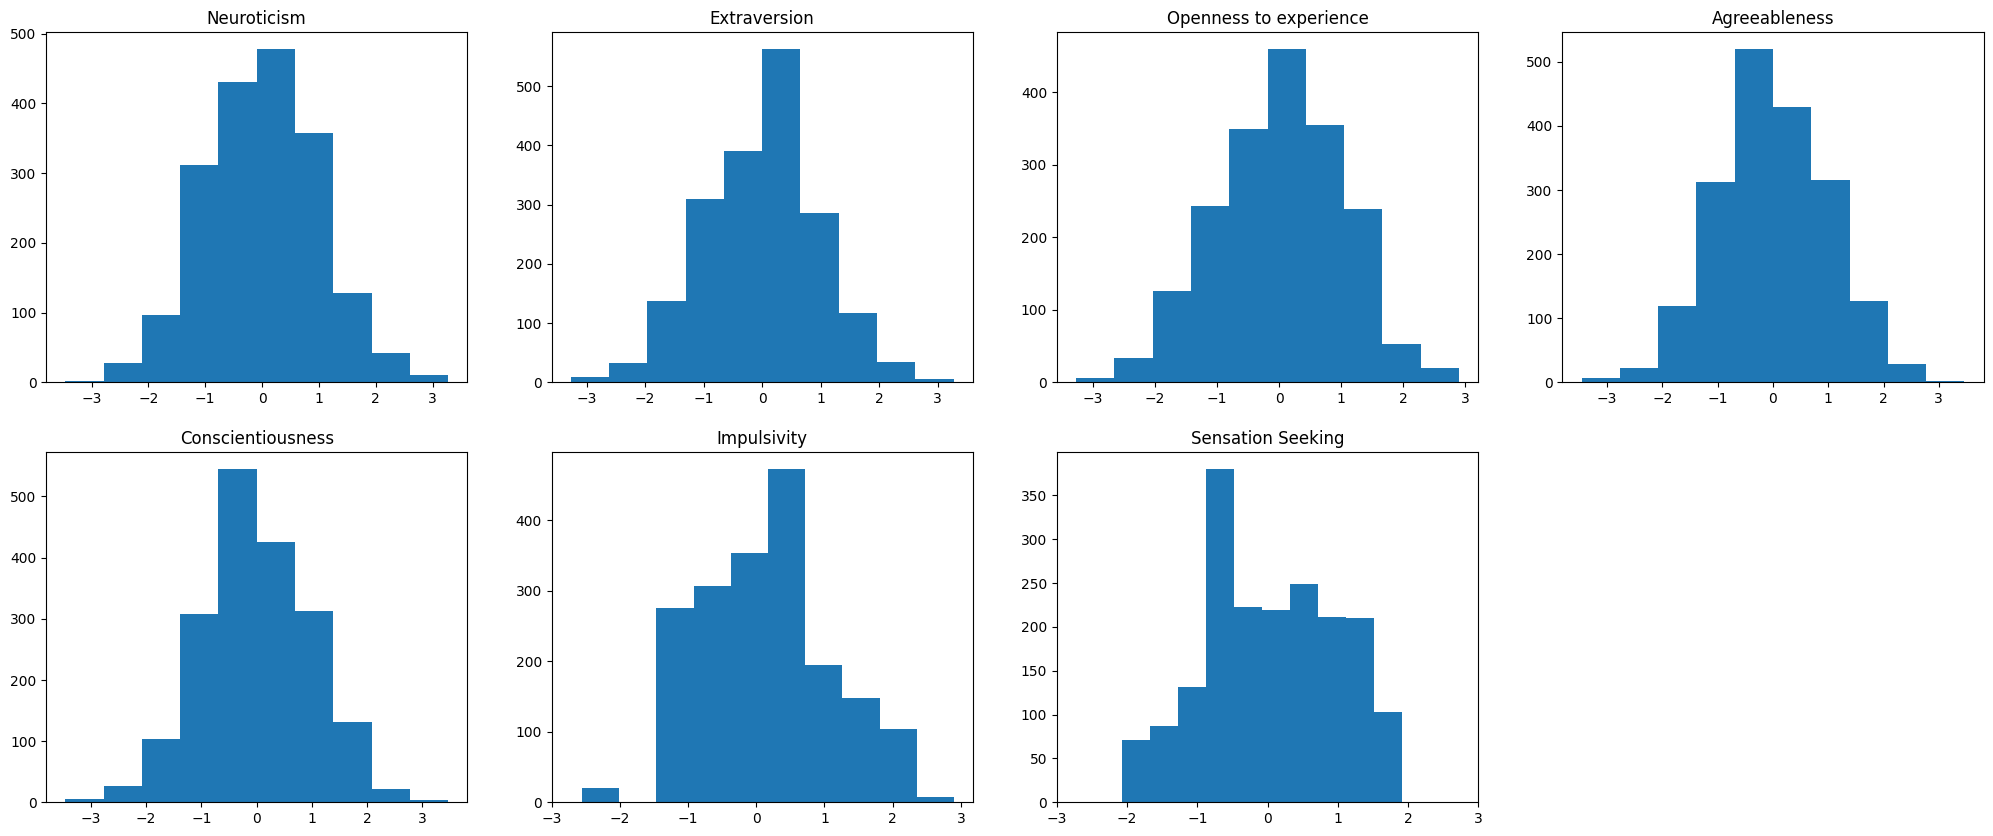

In [54]:
plt.figure(figsize=(25,10))

personality_measures = ['Nscore', 'Escore',	'Oscore',	'AScore',	'Cscore', 'Impulsive', 'SS']#list of personality features
labels = ['Neuroticism', 'Extraversion', 'Openness to experience', 'Agreeableness', 'Conscientiousness', 'Impulsivity', 'Sensation Seeking']
for i in range(len(personality_measures)):
  plt.subplot(2,4
              ,i+1)
  plt.hist(df[personality_measures[i]])
  plt.xticks(np.arange(-3, 4, step=1))  # Set label locations.
  plt.title(labels[i])

plt.show()

In [55]:
df['SS'].describe()

count    1884.000000
mean       -0.002667
std         0.963575
min        -2.078480
25%        -0.525930
50%         0.079870
75%         0.765400
max         1.921730
Name: SS, dtype: float64

###Target drug use

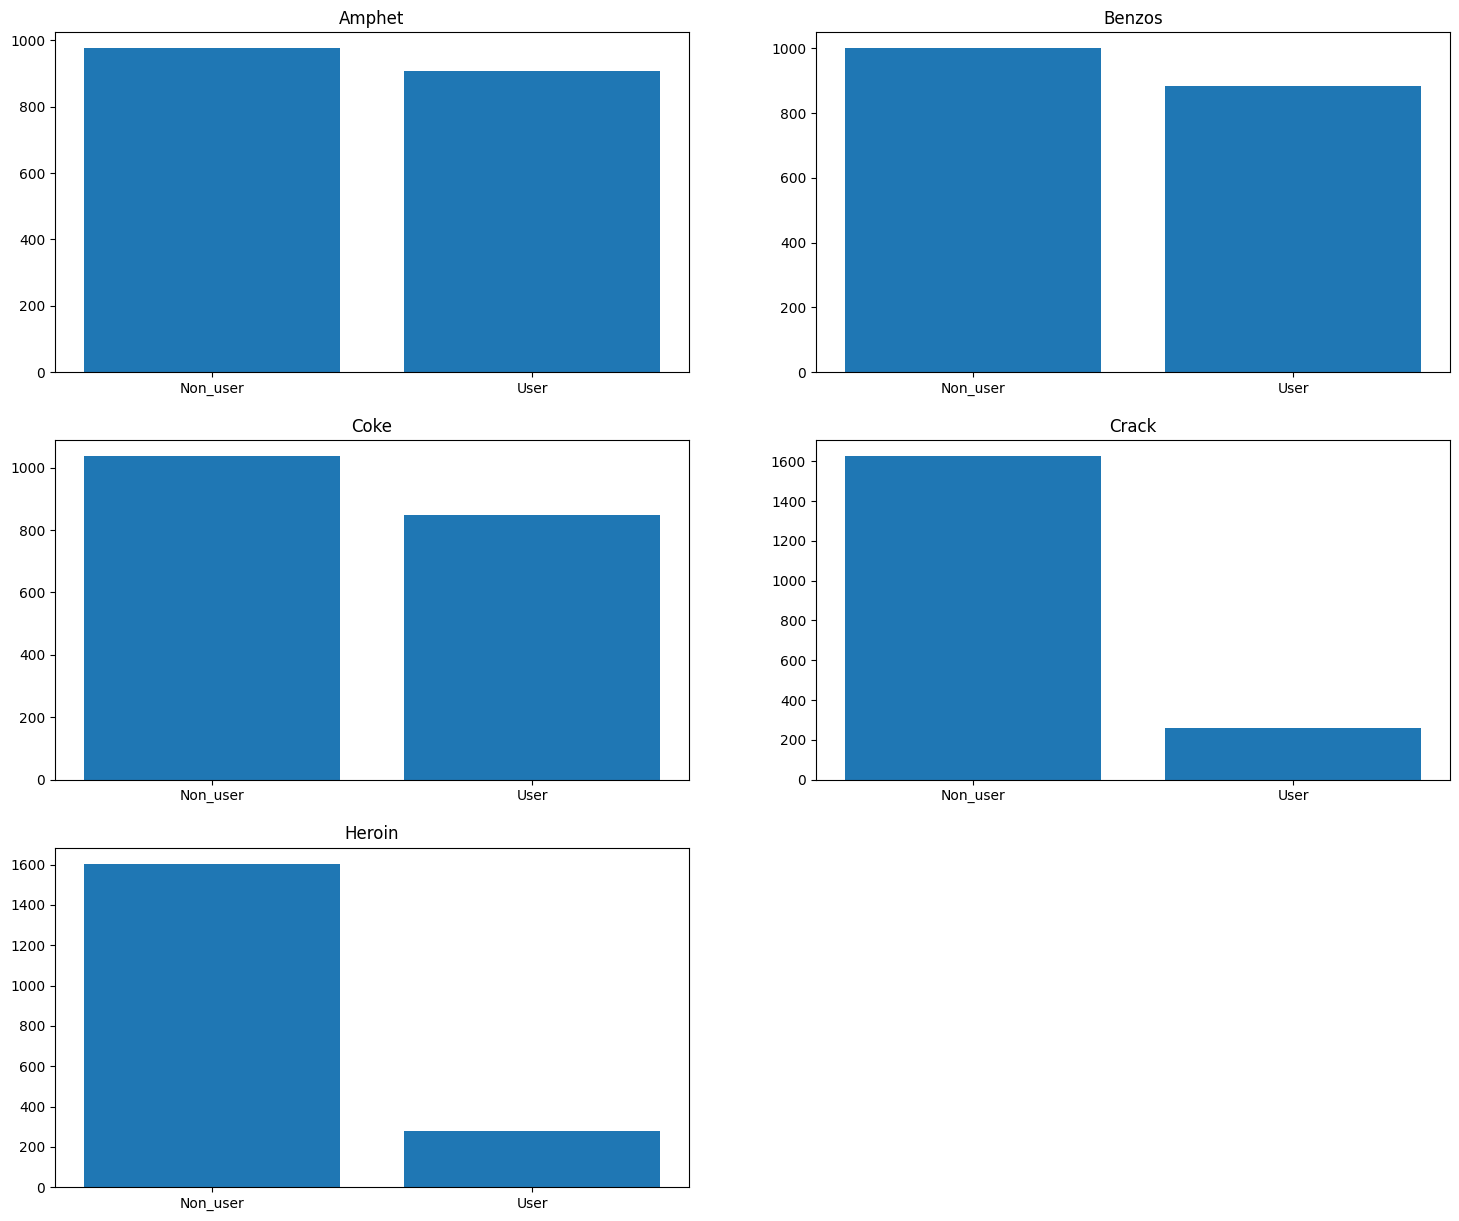

In [56]:
plt.figure(figsize=(18,15))

target_drugs = ['Amphet', 'Benzos', 'Coke', 'Crack', 'Heroin']#list of target features

for i in range(len(target_drugs)):
  var = target_drugs[i]
  plt.subplot(3,2, i+1)
  plt.bar(df.groupby(var)[var].count().index,
          df.groupby(var)[var].count())
  plt.xticks(ticks = [0,1], labels = ['Non_user', 'User'])
  plt.title(target_drugs[i])


plt.show()

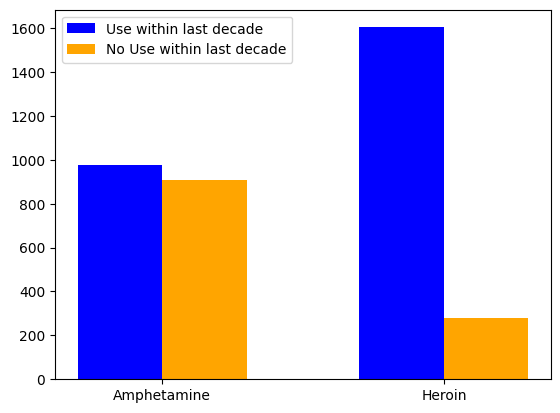

In [57]:
amph = list(df['Amphet'].value_counts())
h = list(df['Heroin'].value_counts())
User = (amph[1], h[1])
NonUser = (amph[0], h[0])
N=2
ind = np.arange(N)
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(ind, NonUser, width, color = 'b', label = 'Use within last decade')
rects2 = ax.bar(ind + width, User, width, color='orange', label = 'No Use within last decade')
plt.xticks(ind + width / 2, ('Amphetamine', 'Heroin'))
plt.legend()
plt.show()

In [58]:
df['Heroin'].value_counts()

Heroin
0    1604
1     280
Name: count, dtype: int64

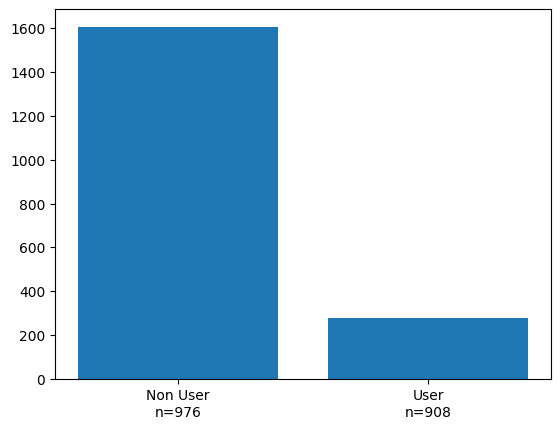

In [59]:

var = 'Heroin'
plt.bar(df.groupby(var)[var].count().index,
          df.groupby(var)[var].count())
plt.xticks(ticks = [0,1], labels = ['Non User\nn=976', 'User\nn=908'])

plt.show()

# Multivariate Analysis

###Demographics and drug use

Age



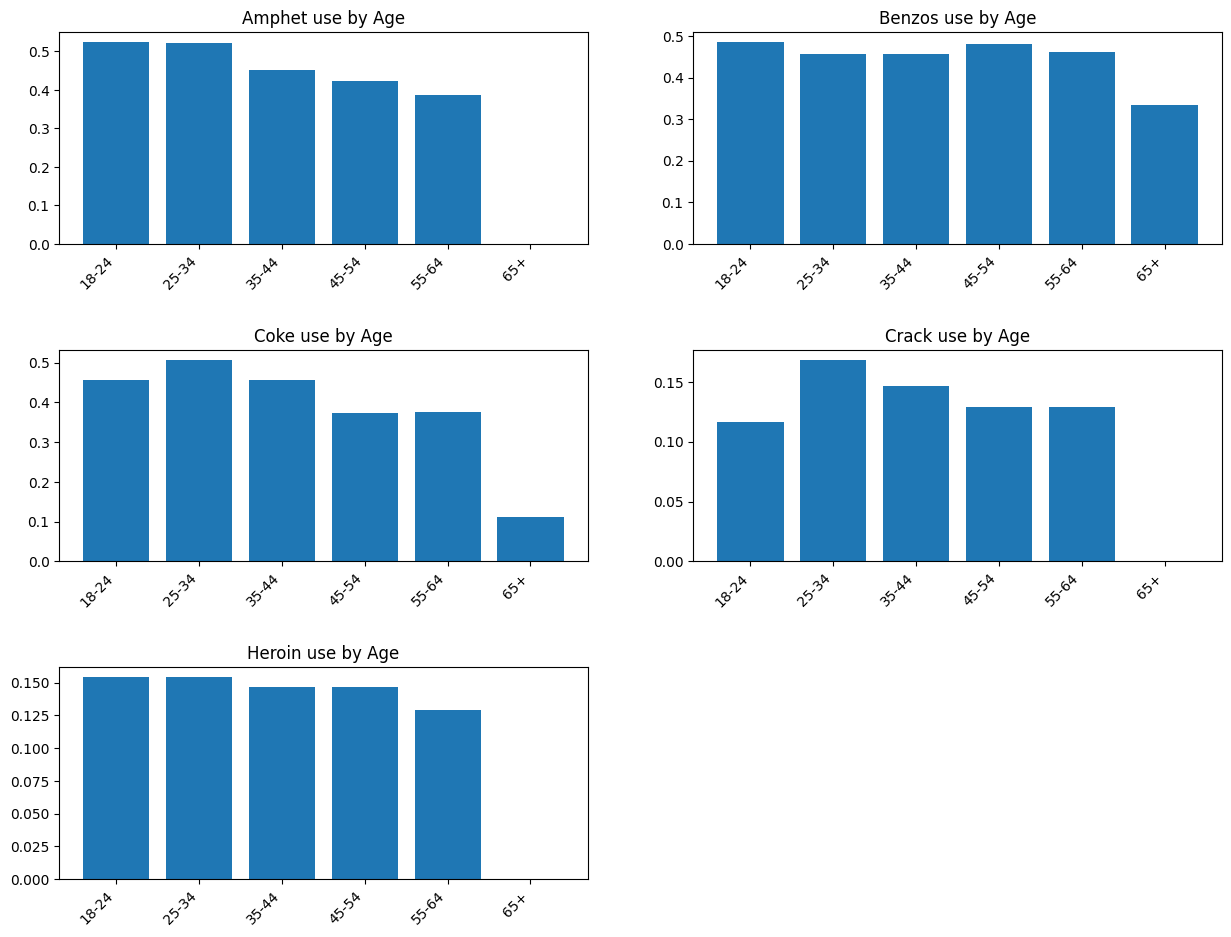

Gender



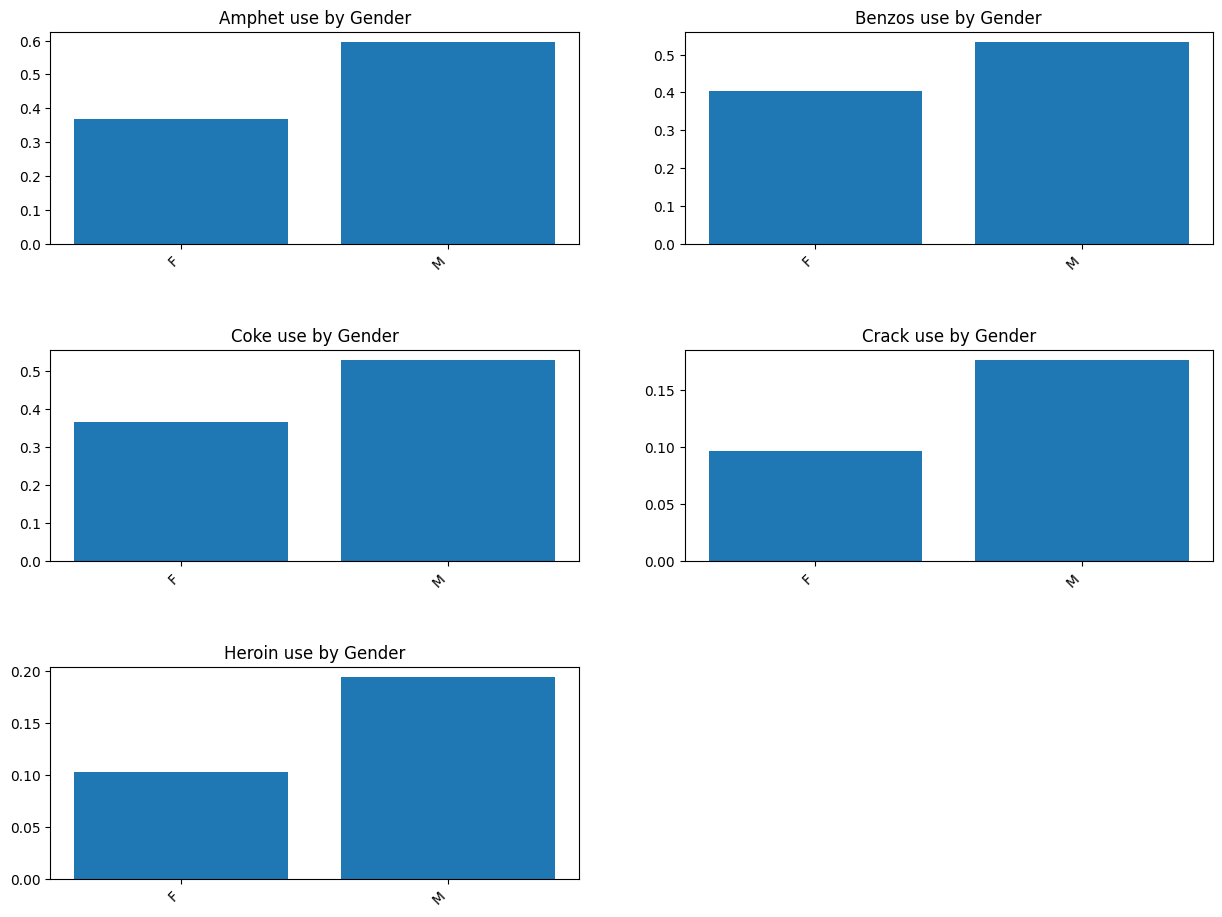

Education



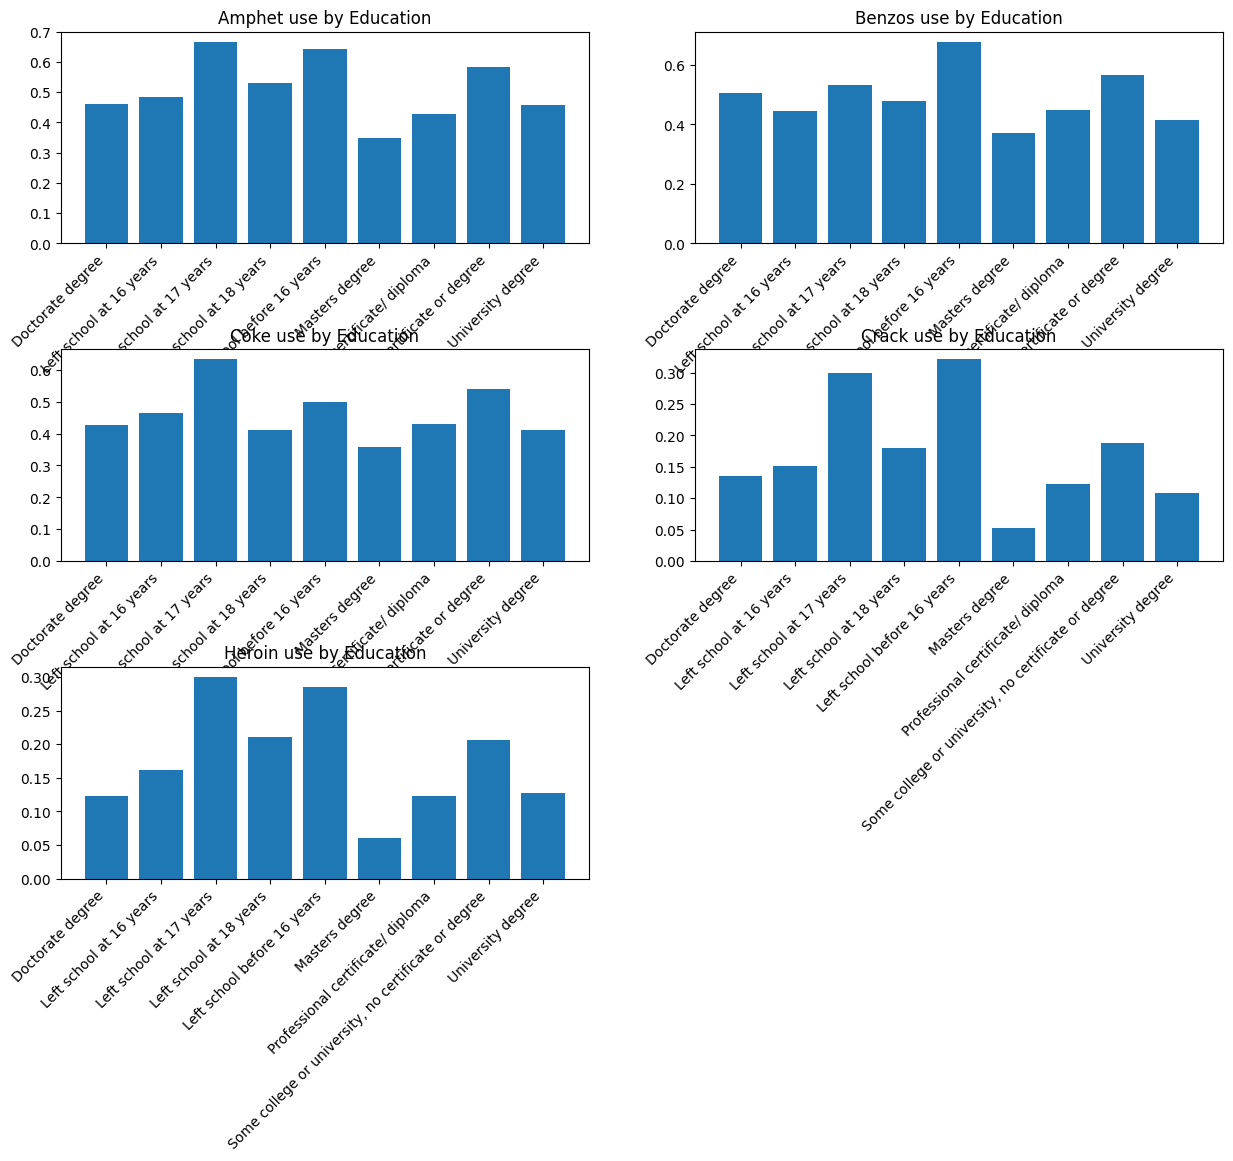

Country



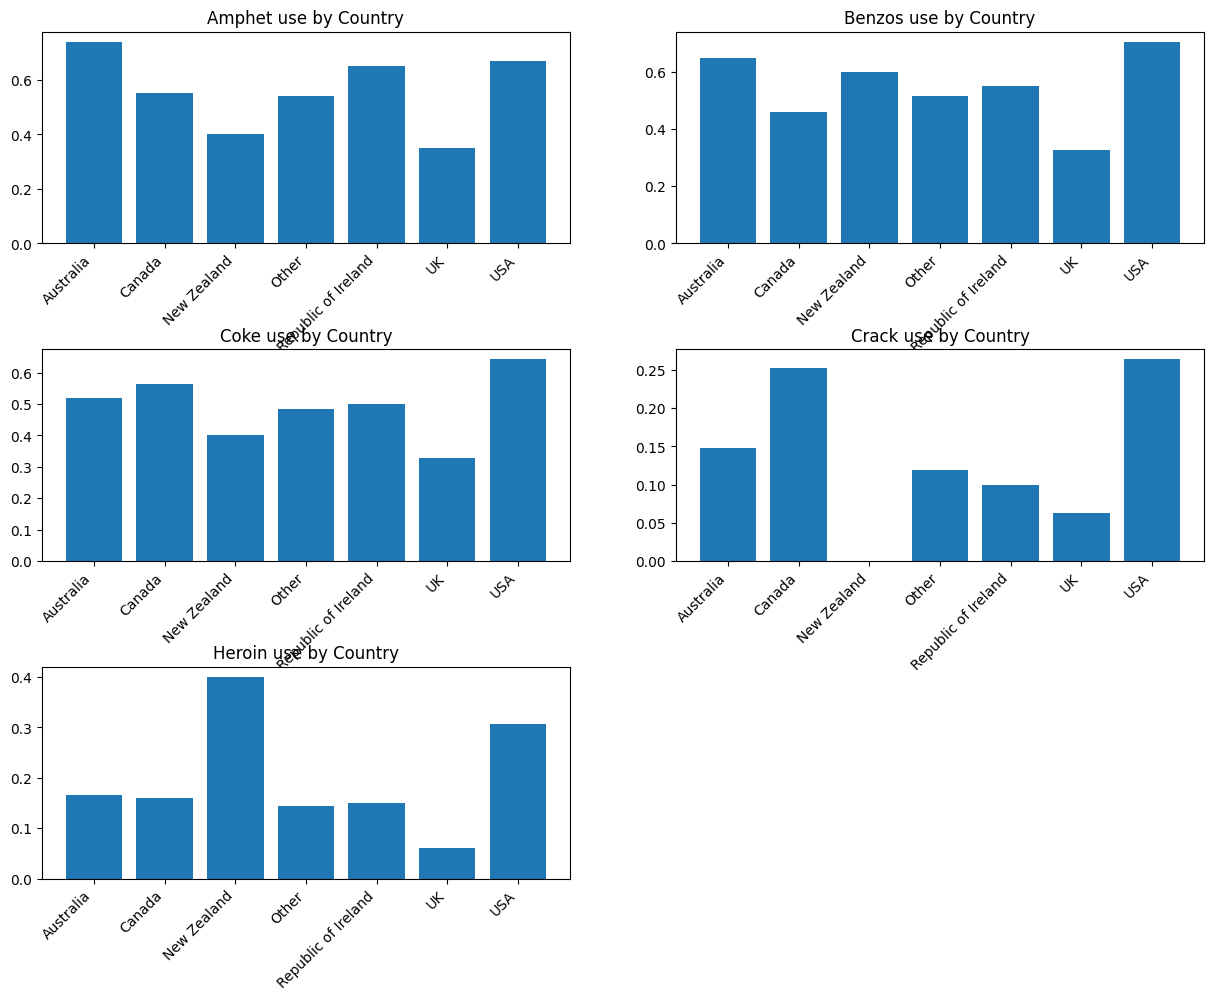

Ethnicity



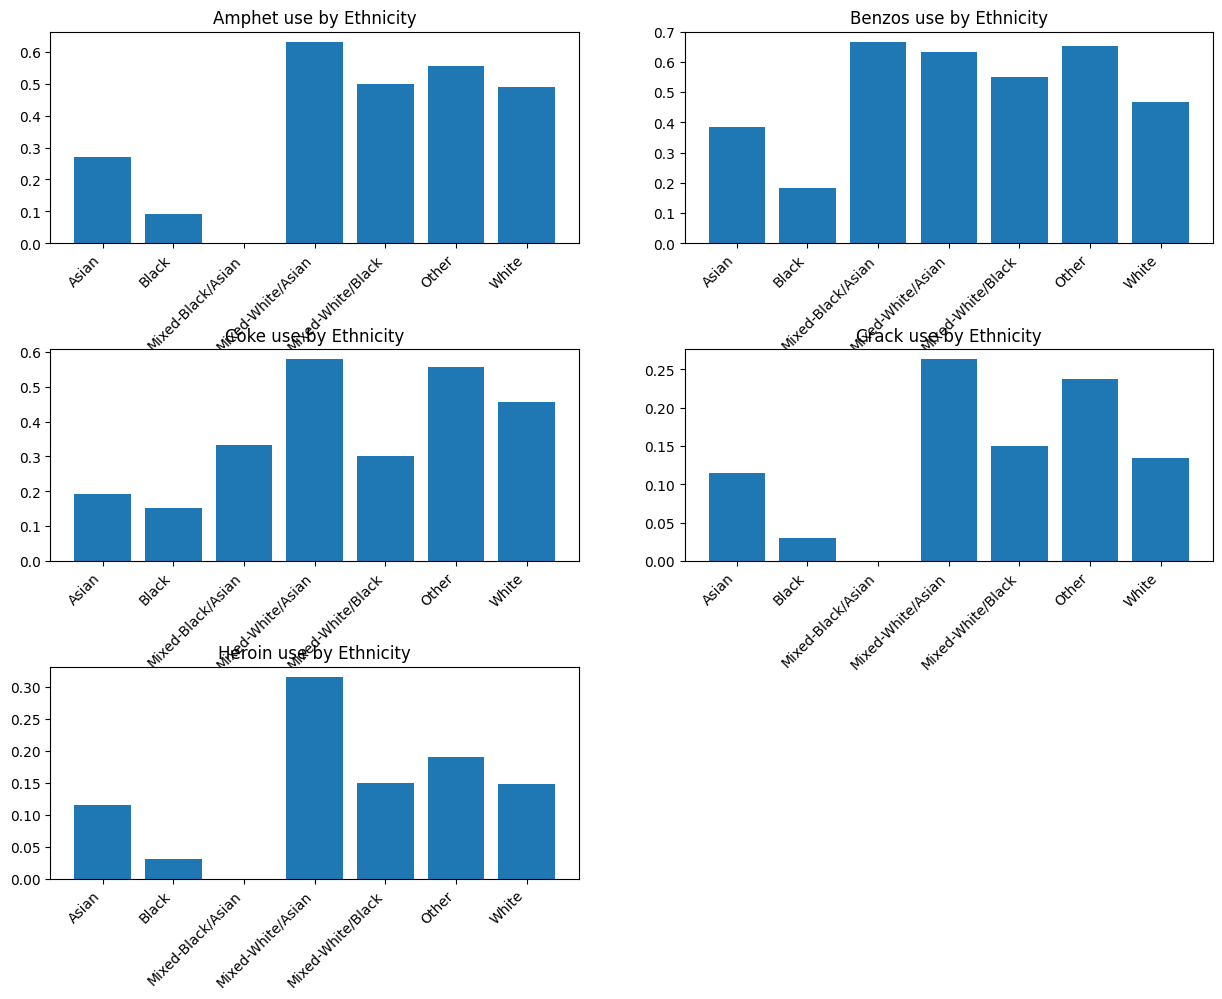

In [60]:
demographics = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']
target_drugs = ['Amphet', 'Benzos', 'Coke', 'Crack', 'Heroin']



for i in range(len(demographics)):
  print(demographics[i] + '\n')
  data = df.groupby(demographics[i])
  plt.figure(figsize=(15,11))
  plt.subplots_adjust(hspace=0.5)

  for j in range(len(target_drugs)):
    plt.subplot(3 ,2, (j+1))
    plt.bar(data[target_drugs[j]].mean().index, data[target_drugs[j]].mean())
    plt.xticks(rotation=45, ha='right')
    plt.title('{} use by {}'.format(target_drugs[j], demographics[i]))
  plt.show()




In [61]:
keys = ['Nscore', 'Escore',	'Oscore',	'AScore',	'Cscore', 'Impulsive', 'SS']
values = ['Neuroticism', 'Extraversion', 'Openness to experience', 'Agreeableness', 'Conscientiousness', 'Impulsivity', 'Sensation Seeking']
personality_dict = dict(map(lambda i,j : (i,j) , keys,values))
new_df = df.rename(columns=personality_dict).rename(columns={'Amphet':'Use of Amphetamines', 'Heroin': 'Use of Heroin'})
amphet_df = new_df[values + ['Use of Amphetamines']];


<Axes: >

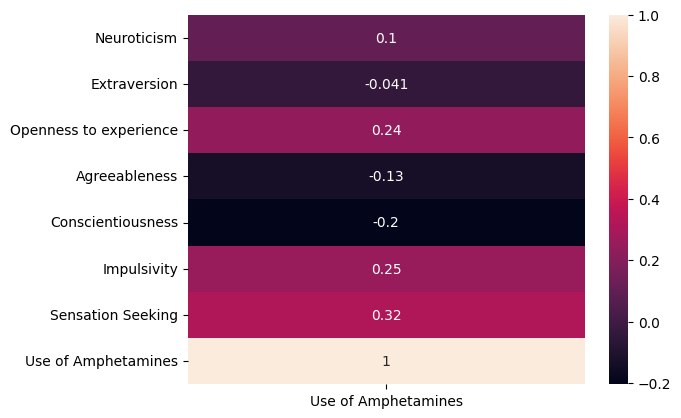

In [62]:
sns.heatmap(amphet_df.corr()[['Use of Amphetamines']], annot=True)

###Personality and drug use

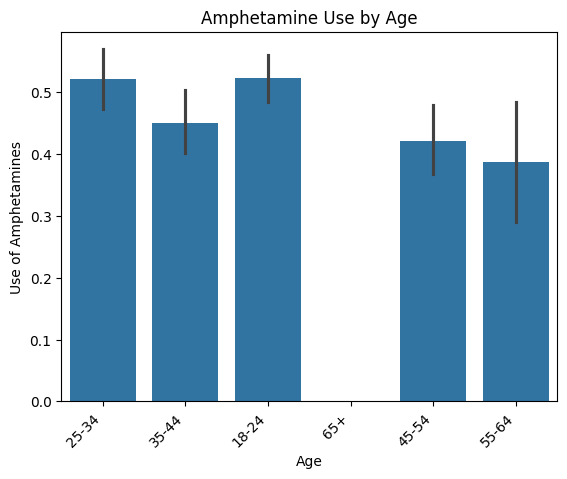

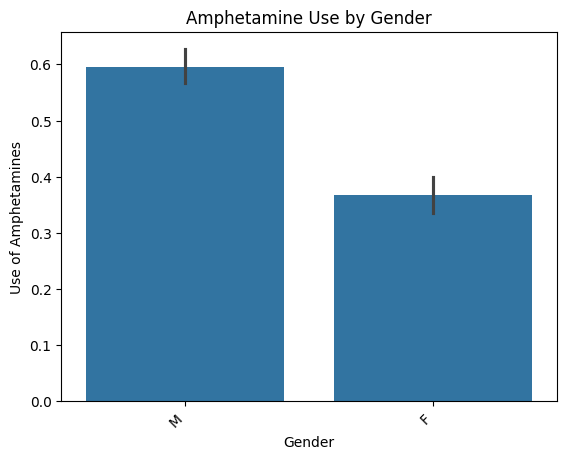

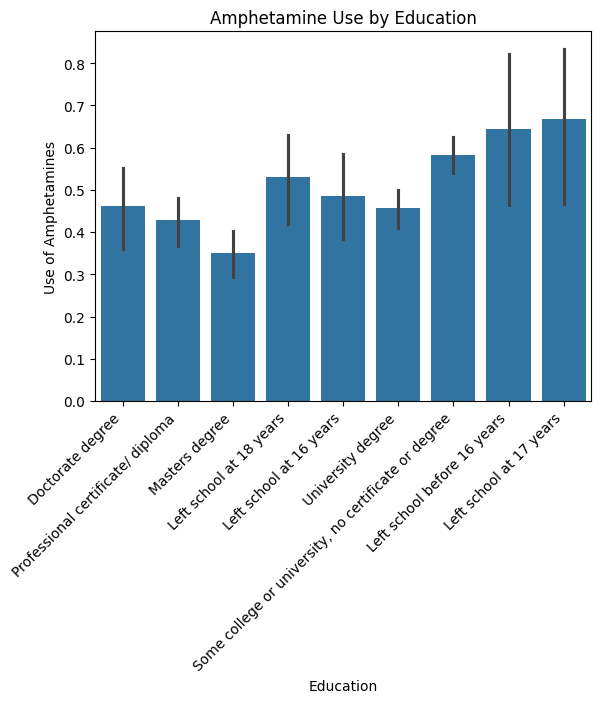

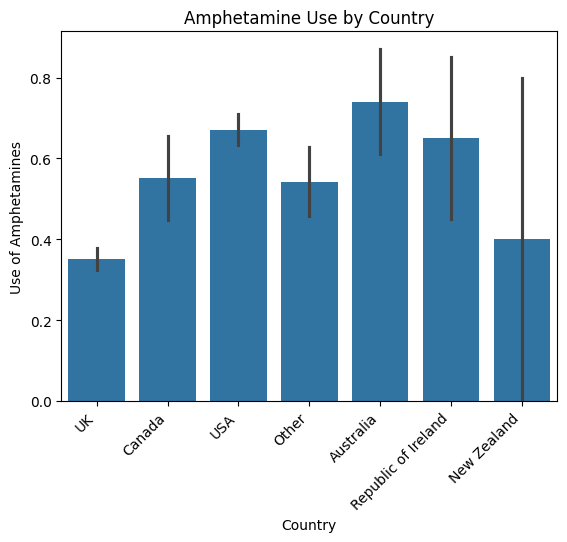

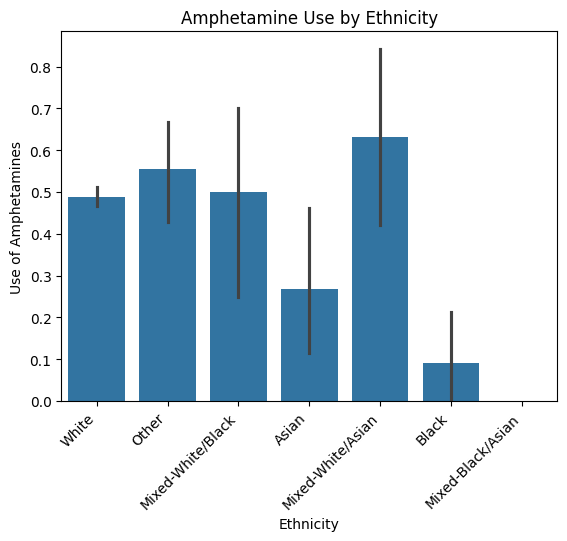

In [63]:
amphetamines_df = df.rename(columns=personality_dict).rename(columns={'Amphet':'Use of Amphetamines'})
demographics = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']
for i in range(len(demographics)):
  sns.barplot(data = amphetamines_df, x = demographics[i], y= 'Use of Amphetamines')
  plt.title('Amphetamine Use by {}'.format(demographics[i]))
  plt.xticks(rotation=45, ha='right')
  plt.show()


In [64]:
df.groupby(['Age'])['Amphet']

In [65]:
new_df['Education'] = pd.Categorical(new_df['Education'],['Left school before 16 years',
      'Left school at 16 years',
       'Left school at 17 years',
        'Left school at 18 years', 'Some college or university, no certificate or degree',
        'Professional certificate/ diploma', 'University degree', 'Masters degree', 'Doctorate degree'])
new_df['Education'] = new_df['Education'].replace({'Some college or university, no certificate or degree': 'Some college, no degree'})

Text(0.5, 1.0, 'Use of Amphetamines by Education Level')

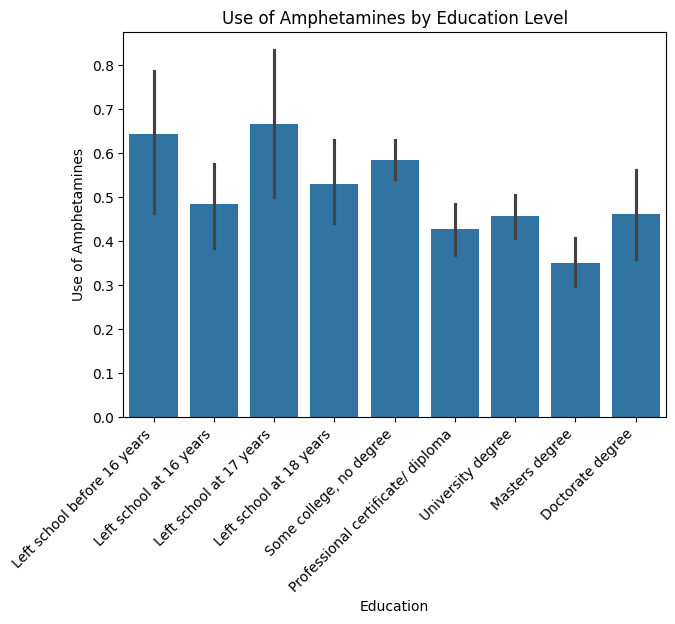

In [66]:
plt.figure(figsize=(7,5))
sns.barplot(data = new_df, x = 'Education', y= 'Use of Amphetamines')
plt.xticks(rotation=45, ha='right')
plt.title('Use of Amphetamines by Education Level')

In [67]:
new_df['Age'].unique()

array(['25-34', '35-44', '18-24', '65+', '45-54', '55-64'], dtype=object)

Text(0.5, 1.0, 'Use of Amphetamines by Age')

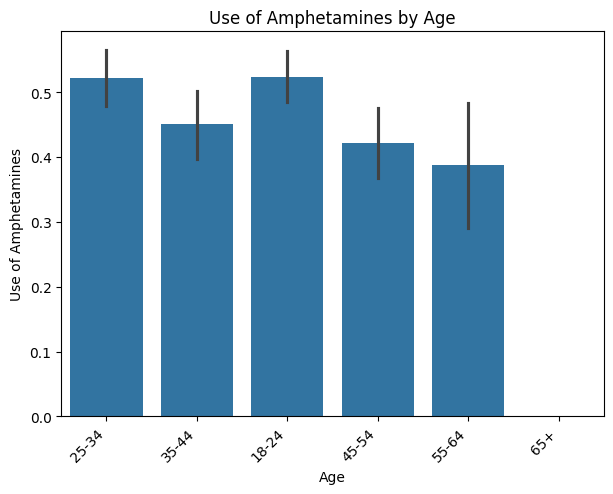

In [68]:
new_df['Age'] = pd.Categorical(new_df['Age'],['25-34', '35-44', '18-24', '45-54', '55-64', '65+'])
plt.figure(figsize=(7,5))
sns.barplot(data = new_df, x = 'Age', y= 'Use of Amphetamines')
plt.xticks(rotation=45, ha='right')
plt.title('Use of Amphetamines by Age')

# Supervised Learning

-Begin with logistic regression: 5 separate models, 1 for each target feature

##Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report


In [70]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

###Amphetamines

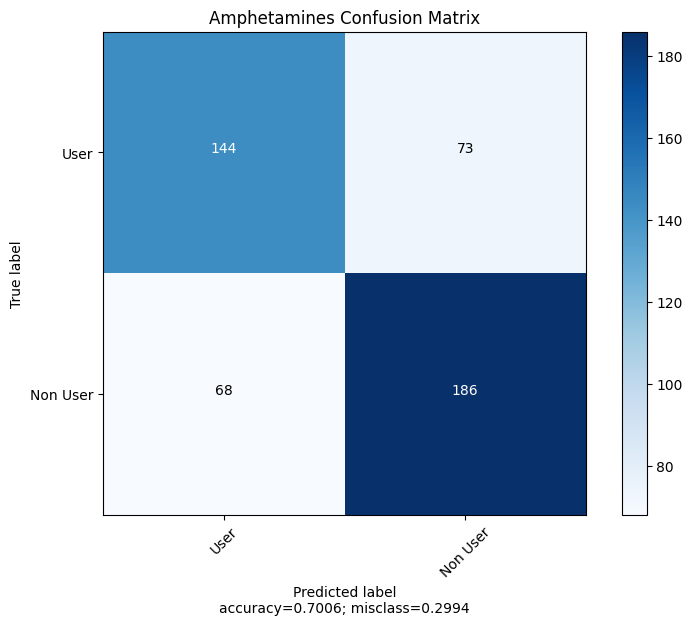

dummy score:
0.5392781316348195.
model accuracy:
0.7006369426751592
precision score:
0.6792452830188679
recall:
0.663594470046083


In [71]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y_amphet = df['Amphet']

X_train, X_test, y_train, y_test = train_test_split(X, y_amphet)

lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

lr_score = lr.score(X_test, y_test)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test,)



confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Amphetamines Confusion Matrix', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}'.format(lr_score, precision, recall))

##Benzodiazepines

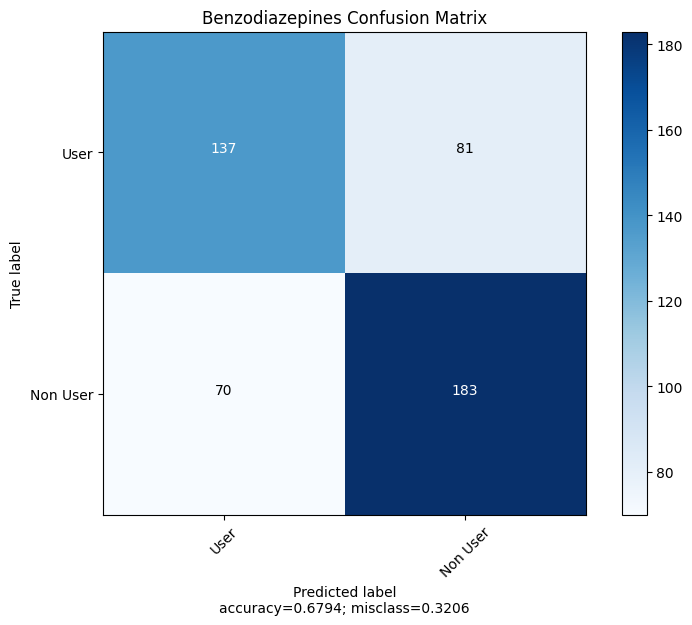

dummy score:
0.5371549893842887.
model accuracy:
0.6794055201698513
precision score:
0.6618357487922706
recall:
0.6284403669724771


In [72]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y_benzos = df['Benzos']

X_train, X_test, y_train, y_test = train_test_split(X, y_benzos)

lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

lr_score = lr.score(X_test, y_test)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test,)



confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Benzodiazepines Confusion Matrix', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}'.format(lr_score, precision, recall))


##Cocaine

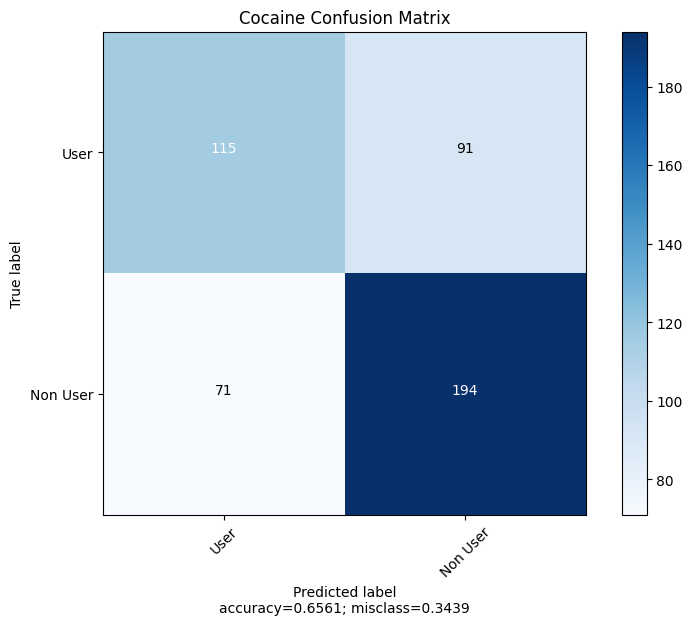

dummy score:
0.5626326963906582.
model accuracy:
0.6560509554140127
precision score:
0.6182795698924731
recall:
0.558252427184466


In [73]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y_coke = df['Coke']

X_train, X_test, y_train, y_test = train_test_split(X, y_coke)

lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

lr_score = lr.score(X_test, y_test)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test,)



confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Cocaine Confusion Matrix', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}'.format(lr_score, precision, recall))


###Crack cocaine

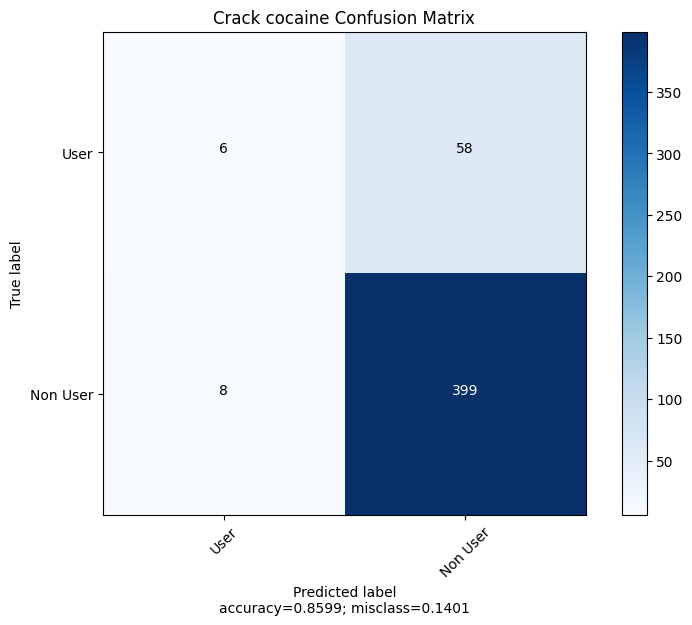

dummy score:
0.8641188959660298.
model accuracy:
0.8598726114649682
precision score:
0.42857142857142855
recall:
0.09375


In [74]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y_crack = df['Crack']

X_train, X_test, y_train, y_test = train_test_split(X, y_crack)

lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

lr_score = lr.score(X_test, y_test)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test,)



confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Crack cocaine Confusion Matrix', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}'.format(lr_score, precision, recall))


###Heroin

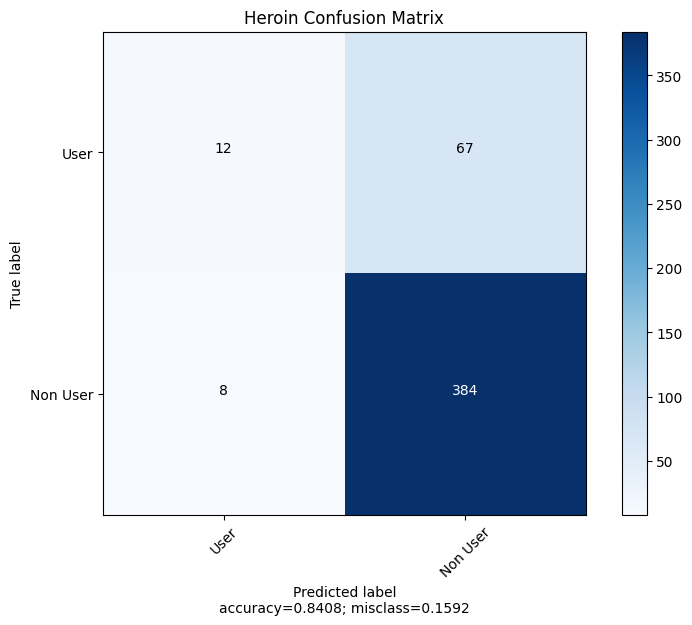

dummy score:
0.832271762208068.
model accuracy:
0.8407643312101911
precision score:
0.6
recall:
0.1518987341772152


In [75]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y_heroin = df['Heroin']

X_train, X_test, y_train, y_test = train_test_split(X, y_heroin)

lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

lr_score = lr.score(X_test, y_test)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test,)



confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Heroin Confusion Matrix', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}'.format(lr_score, precision, recall))


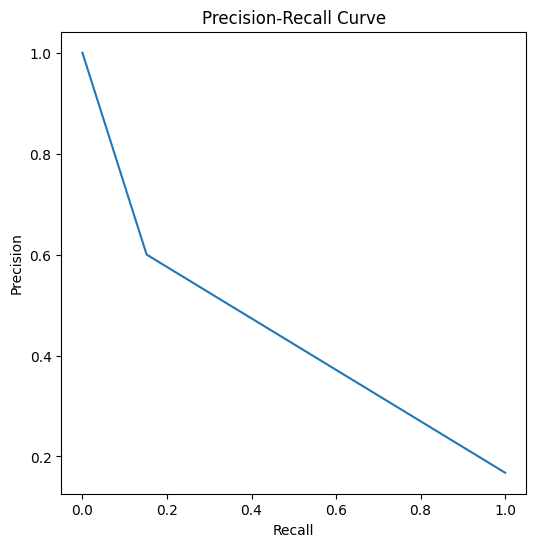

In [76]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#Model Comparisons - Amphetamines and Heroin Use

##Comparison of Logistic Regression and Random Forest for predicting use of amphetamines and heroin


-To limit analysis to a digestible scope, take a closer look at the targets with the most balanced classes (amphetamines) and least balanced (classes). Compare performance of two algorithms - logistic regression and random forest

#Amphetamines

###Logistic Regression

In [77]:
# Find best hyperparameters for logistic regression

from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y = df['Amphet']
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalties = ['l2', 'l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalties,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


#Because classes are balanced, use accuracy score

grid_search = GridSearchCV(estimator=model,
                           param_grid=grid,
                           n_jobs=-1,
                           scoring='accuracy',
                           cv=cv,error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.691097 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.690737 (0.024941) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.690915 (0.025102) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.690737 (0.024941) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.690561 (0.024717) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.690031 (0.024726) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.690208 (0.024717) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.690032 (0.025052) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.689678 (0.025387) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.690565 (0.026383) with: 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [78]:
grid_result.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

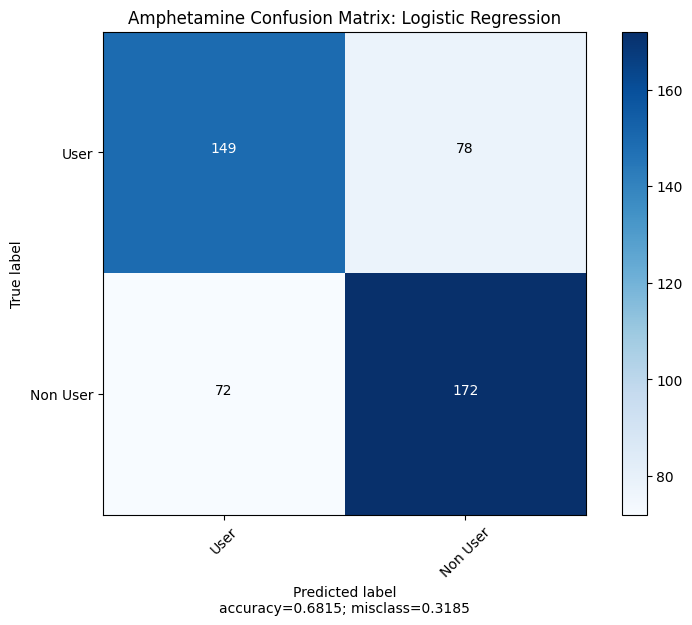

dummy score:
0.5180467091295117.
model accuracy:
0.6815286624203821
precision score:
0.6742081447963801
recall:
0.6563876651982379


In [79]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y = df['Amphet']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

params = list(grid_result.best_params_.values())

lr = LogisticRegression(C = 1.0, penalty ='l2', solver ='liblinear')
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

lr_score = lr.score(X_test, y_test)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

amphet_lr_report = classification_report(y_test, predictions, target_names=['User', 'Non_user'])

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test,)



confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Amphetamine Confusion Matrix: Logistic Regression', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}'.format(lr_score, precision, recall))

###Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

param_dist = {'n_estimators': list(range(10,500)),
              'max_depth': list(range(1,20))}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'n_estimators': [10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19, 20, 21,
                                                         22, 23, 24, 25, 26, 27,
                                                         28, 29, 30, 31, 32, 33,
                                                         34, 35, 36, 37, 38, 39, ...]})

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split


In [82]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y = df['Amphet']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Number of trees
n_estimators = np.arange(200, 2200, 200)
# Number of features to consider at each split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [np.arange(10, 110, 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = random_grid,
                                 n_iter=5,
                                 cv=5,
                                 scoring='accuracy')
rand_search.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000])},
                   scoring='accuracy')

In [83]:
rand_search.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

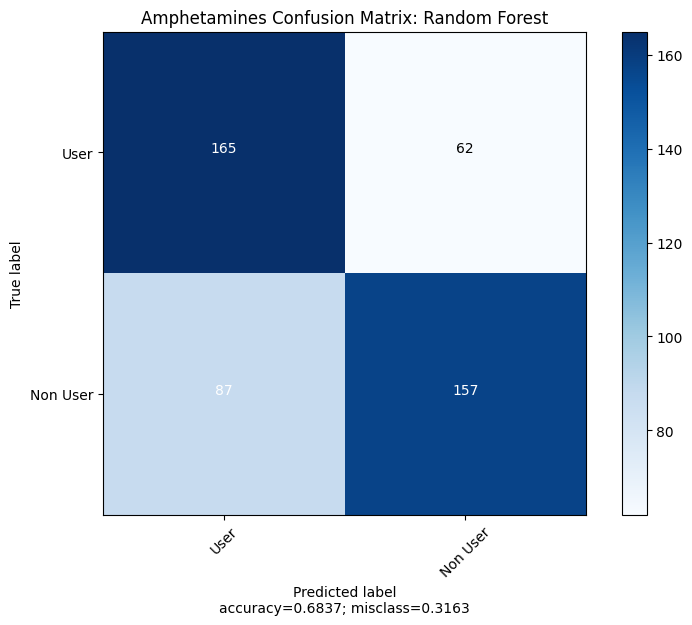

dummy score:
0.5180467091295117.
model accuracy:
0.6836518046709129
precision score:
0.6547619047619048
recall:
0.7268722466960352


In [84]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y = df['Amphet']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

predictions = rand_search.predict(X_test)

rf_score = rand_search.score(X_test, y_test)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test,)


amphet_rf_report = classification_report(y_test, predictions, target_names=['User', 'Non_user'])


confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Amphetamines Confusion Matrix: Random Forest', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}'.format(rf_score, precision, recall))

#Heroin

###Logistic Regression

In [85]:
# Tuning hyperparameters for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y = df['Heroin']
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

from sklearn.metrics import fbeta_score, make_scorer

#class imbalance - to favor recall, use f2 score
ftwo_scorer = make_scorer(fbeta_score, beta=2)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring=ftwo_scorer, cv=cv,error_score=0)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.691097 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.690737 (0.024941) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.690915 (0.025102) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.690737 (0.024941) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.690561 (0.024717) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.690031 (0.024726) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.690208 (0.024717) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.690032 (0.025052) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.689678 (0.025387) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.690565 (0.026383) with: 

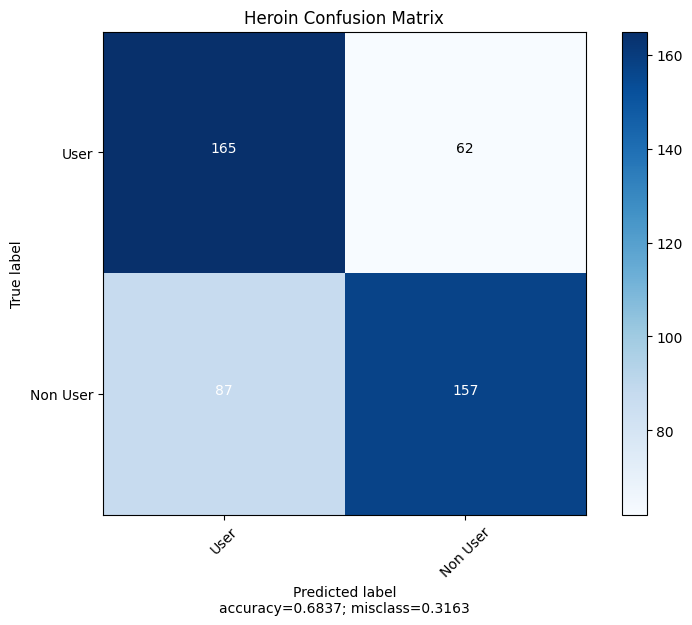

dummy score:
0.5180467091295117.
model accuracy:
0.12027491408934707
precision score:
0.30434782608695654
recall:
0.1044776119402985
f2 score:
0.8386411889596603


In [87]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y = df['Heroin']
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = grid_search.fit(X_train, y_train)

predictions = lr.predict(X_test)

h_lr_score = lr.score(X_test, y_test)
h_lr_recall = recall_score(y_test, predictions)
h_lr_precision = precision_score(y_test, predictions)
h_lr_weighted = fbeta_score(y_test, predictions, average='micro', beta=2)
heroin_lr_report = classification_report(y_test, predictions, target_names=['User', 'Non_user'])

heroin_f2_lr ={}
heroin_f2_lr['macro'] = fbeta_score(y_test, predictions, average='macro', beta=2)
heroin_f2_lr['micro'] = fbeta_score(y_test, predictions, average='micro', beta=2)
heroin_f2_lr['weighted'] = fbeta_score(y_test, predictions, average='micro', beta=2)



heroin_lr_confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Heroin Confusion Matrix', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}\nf2 score:\n{}'.format(h_lr_score, h_lr_precision, h_lr_recall, h_lr_weighted))

###Random Forest

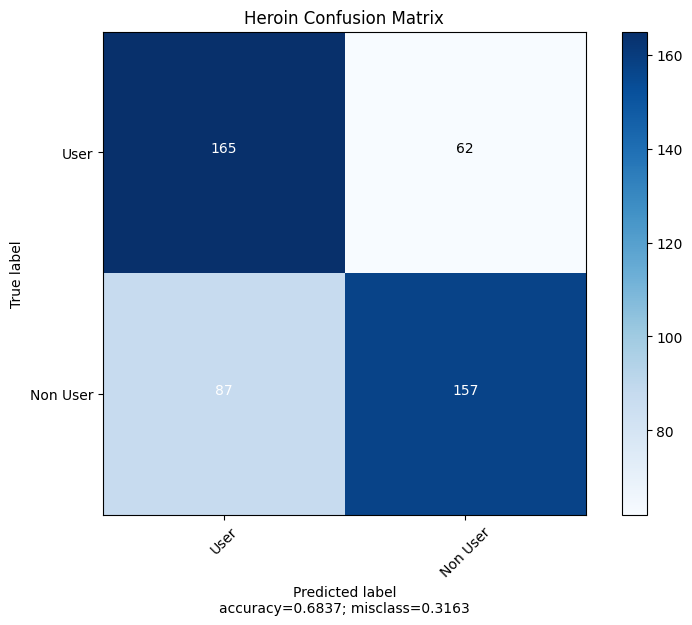

dummy score:
0.5180467091295117.
model accuracy:
0.8492569002123143
precision score:
0.3333333333333333
recall:
0.014285714285714285
f2:
0.8492569002123143


In [88]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y_heroin = df['Heroin']

X_train, X_test, y_train, y_test = train_test_split(X, y_heroin)

param_dist = {'n_estimators': list(range(10,500)),
              'max_depth': list(range(1,20))}

# Create a random forest classifier
rf = RandomForestClassifier()

from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

param_dist = {'n_estimators': list(range(10,500)),
              'max_depth': list(range(1,20))}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5,
                                 scoring = ftwo_scorer)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

predictions = rand_search.predict(X_test)

h_rf_accuracy = accuracy_score(y_test, predictions)
h_rf_recall = recall_score(y_test, predictions)
h_rf_precision = precision_score(y_test, predictions)

h_rf_f2_weighted = fbeta_score(y_test, predictions, average='micro', beta=2)




heroin_rf_confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Heroin Confusion Matrix', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}\nf2:\n{}'.format(h_rf_accuracy, h_rf_precision, h_rf_recall, h_rf_f2_weighted))


#Model Comparison - Conclusions

###Amphetamines

In [89]:
print('Logistic Regression for Amphetamine Use:\n{}'.format(amphet_lr_report))
print('Random Forest for Amphetamine Use:\n{}'.format(amphet_rf_report))

Logistic Regression for Amphetamine Use:
              precision    recall  f1-score   support

        User       0.69      0.70      0.70       244
    Non_user       0.67      0.66      0.67       227

    accuracy                           0.68       471
   macro avg       0.68      0.68      0.68       471
weighted avg       0.68      0.68      0.68       471

Random Forest for Amphetamine Use:
              precision    recall  f1-score   support

        User       0.72      0.64      0.68       244
    Non_user       0.65      0.73      0.69       227

    accuracy                           0.68       471
   macro avg       0.69      0.69      0.68       471
weighted avg       0.69      0.68      0.68       471



Logistic Regression and Random Forest perform similarly well in binary classification for amphetamine use. Dummy scores for amphetamine are roughly 0.5, indicating a significant improvement for both models over baseline.

###Heroin

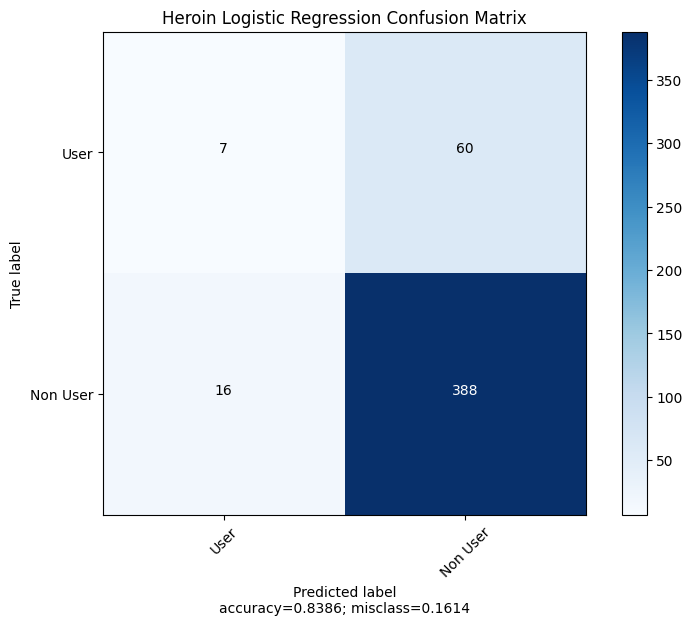

None
model accuracy:
0.12027491408934707
precision score:
0.30434782608695654
recall:
0.1044776119402985
f2 score:
0.8386411889596603


In [90]:
print(plot_confusion_matrix(cm = heroin_lr_confusion, target_names = ['User', 'Non User'], title = 'Heroin Logistic Regression Confusion Matrix', normalize = False))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}\nf2 score:\n{}'.format(h_lr_score, h_lr_precision, h_lr_recall, h_lr_weighted))






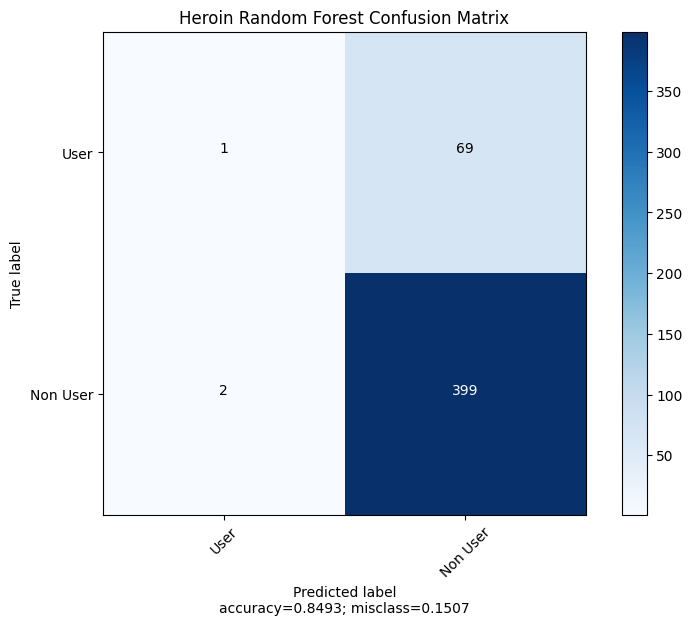

None
model accuracy:
0.8492569002123143
precision score:
0.3333333333333333
recall:
0.014285714285714285
f2:
0.8492569002123143


In [91]:
print(plot_confusion_matrix(cm = heroin_rf_confusion, target_names = ['User', 'Non User'], title = 'Heroin Random Forest Confusion Matrix', normalize = False))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}\nf2:\n{}'.format(h_rf_accuracy, h_rf_precision, h_rf_recall, h_rf_f2_weighted))

For binary classificatin of heroin use, logistic regression tends significantly outperforms random forest at recall. f2 score and overall accuracy are comparable. However, given that the frequency of heroin users is 0.149, logistic regression's recall score of roughly 0.155 suggests only a modest performance above chance.

In [92]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y = df['Heroin']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = random_grid,
                                 n_iter=5,
                                 cv=5,
                                 scoring=ftwo_scorer)
rand_search_result = rand_search.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

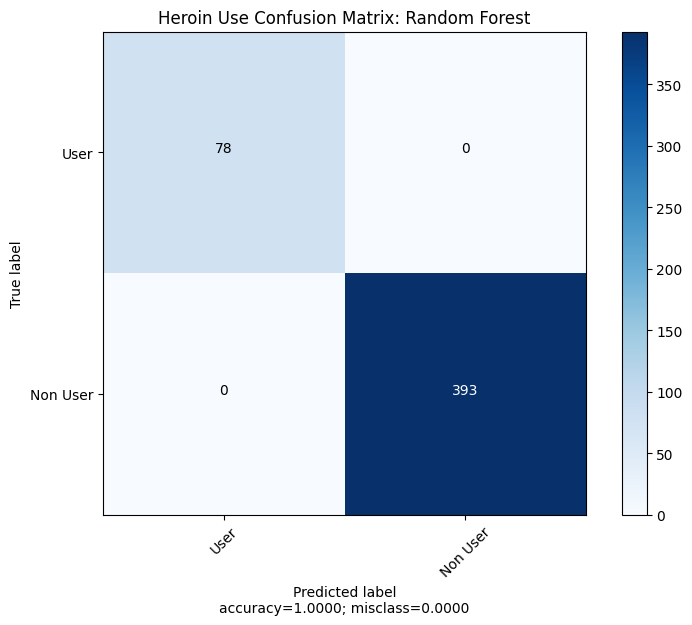

dummy score:
0.8343949044585988.
model accuracy:
1.0
precision score:
1.0
recall:
1.0


In [93]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y = df['Heroin']
X_train, X_test, y_train, y_test = train_test_split(X, y)

predictions = rand_search_result.predict(X_test)

rf_score = rand_search_result.score(X_test, y_test)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test,)


amphet_rf_report = classification_report(y_test, predictions, target_names=['User', 'Non_user'])


confusion = confusion_matrix(y_test, predictions, labels=[1,0])
plot_confusion_matrix(cm = confusion, target_names = ['User', 'Non User'], title = 'Heroin Use Confusion Matrix: Random Forest', normalize = False)

print('dummy score:\n{}.'.format(dummy_score))
print('model accuracy:\n{}\nprecision score:\n{}\nrecall:\n{}'.format(rf_score, precision, recall))

In [94]:
X_train

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65+,Gender_M,Education_Left school at 16 years,Education_Left school at 17 years,Education_Left school at 18 years,Education_Left school before 16 years,Education_Masters degree,Education_Professional certificate/ diploma,"Education_Some college or university, no certificate or degree",Education_University degree,Country_Canada,Country_New Zealand,Country_Other,Country_Republic of Ireland,Country_UK,Country_USA,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White
1268,1.72012,-0.94779,-1.82919,0.76096,-1.01450,0.19268,-2.07848,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
1153,0.22393,-0.15487,-0.31776,-0.60633,0.41594,-0.21712,-0.52593,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
1306,0.52135,-0.80615,-0.97631,-0.76096,-0.27607,0.52975,0.40148,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
852,0.52135,0.80523,0.58331,-1.07533,-1.13788,0.52975,1.22470,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
426,-0.92104,-0.15487,-2.09015,0.28783,0.75830,-1.37983,-1.54858,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,-1.55078,0.63779,-0.31776,-0.60633,-0.27607,0.52975,0.76540,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
1539,-0.14882,-0.43999,-0.71727,-0.76096,-1.64101,1.29221,0.76540,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
1799,-0.14882,1.74091,1.06238,0.28783,-1.01450,0.88113,0.76540,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
159,1.02119,0.80523,0.44585,-0.15487,0.25953,-0.21712,0.40148,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True


In [95]:
X  = pd.get_dummies(df.drop(['Amphet','Benzos', 'Coke', 'Crack', 'Heroin'], axis=1), drop_first=True)
y = df['Heroin']
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalties = ['l2', 'l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalties,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


#Because classes are balanced, use accuracy score

grid_search = GridSearchCV(estimator=model,
                           param_grid=grid,
                           n_jobs=-1,
                           scoring='accuracy',
                           cv=cv,error_score=0)
grid_result = grid_search.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv